In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def vis_f1(n, d, C_seq, title=True, graph="random", show_legend=True, show_xlabel=True, show_C=True):
    aux = []
    suggestedthreshold = []
    
    color = sns.color_palette()
    
    f1 = pd.DataFrame()
    if(graph == "random"):
        for j in range(len(C_seq)):
            C = C_seq[j]
            new = pd.read_csv( "../data/f1thresholded_C" + str(C) + "n" + str(n) + "d" + str(d) + ".csv")#, index_col="threshold")
            new["C"] = C
            f1 = f1.append(new)
            
            aux = pd.read_csv( "../data/aux_f1thresholded_C" +str(C) + "n" + str(n) + "d" + str(d) + ".csv")
            suggestedthreshold.append(1 * C * aux.iloc[0,0])
    else:
        for j in range(len(C_seq)):
            C = C_seq[j]
            new = pd.read_csv( "../data/sff1thresholded_C" + str(C) + "n" + str(n) + "d" + str(d) + ".csv")#, index_col="threshold")
            new["C"] = C
            f1 = f1.append(new)
            
            aux = pd.read_csv( "../data/aux_sff1thresholded_C" +str(C) + "n" + str(n) + "d" + str(d) + ".csv")
            suggestedthreshold.append(1 * C * aux.iloc[0,0])
    
    plt.figure(figsize=(16,6))
    
    
    g = sns.FacetGrid(f1, col="C", aspect=1.7)
    g.set(ylim=(0, 1))
    g.map(sns.lineplot, "threshold", "f1score", color=color[0], linewidth=5)
    g.map(sns.lineplot, "threshold", "precision", color=color[1], linewidth=5, linestyle="dotted")
    g.map(sns.lineplot, "threshold", "recall", color=color[2], linewidth=5, linestyle="--")
    if show_legend:
        g.add_legend(labels=("F1", "Precision", "Recall"), fontsize=30) 
    g.set_axis_labels("Threshold", "Score")
    g.fig.set_figheight(5)
    
    i = 0
    for ax in g.axes.flat:
        if show_xlabel:  
            ax.set_xlabel(ax.get_xlabel(), fontsize= 30)
        else:
            ax.set_xlabel("")
        if show_C:
            ax.set_title(ax.get_title(), fontsize=30)
        else:
            ax.set_title("")
        ax.set_ylabel(ax.get_ylabel(), fontsize= 30)
        
        ax.axvline( suggestedthreshold[i], linewidth=3)
        i += 1
        ax.set_xticks((0.05, 0.10, 0.15, 0.20))
        ax.xaxis.set_tick_params(labelsize=20)
        ax.yaxis.set_tick_params(labelsize=20)
        
    g.savefig("../plots/" + graph + "/n" + str(n) + "d" + str(d) + "f1C" + ".pdf", format="pdf") 
    if title:
        plt.title("Performance of the thresholded AV, "+"C=" + str(C) + ", d=" + str(d) + ", n=" + str(n))
    plt.show()

/home/mike/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self.fig.legend(handles, labels, **kwargs)


<Figure size 1152x432 with 0 Axes>

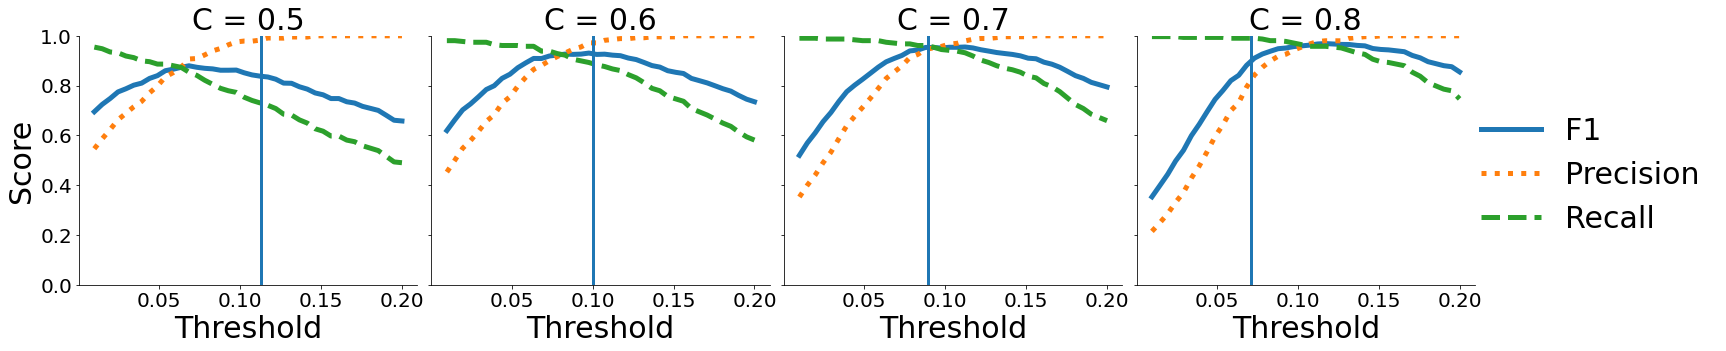

In [7]:
vis_f1(300, 200, (0.5, 0.6, 0.7, 0.8), title=False)

<Figure size 1152x432 with 0 Axes>

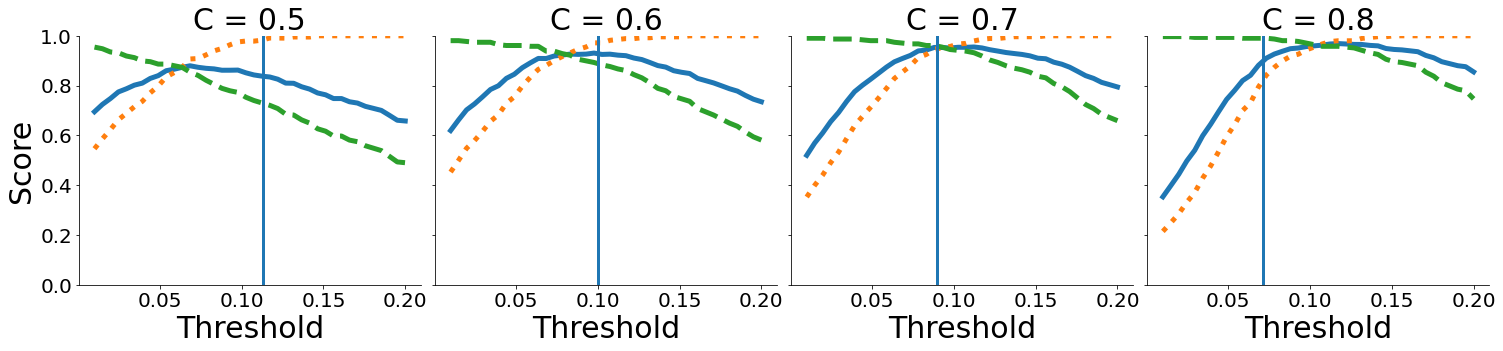

<Figure size 1152x432 with 0 Axes>

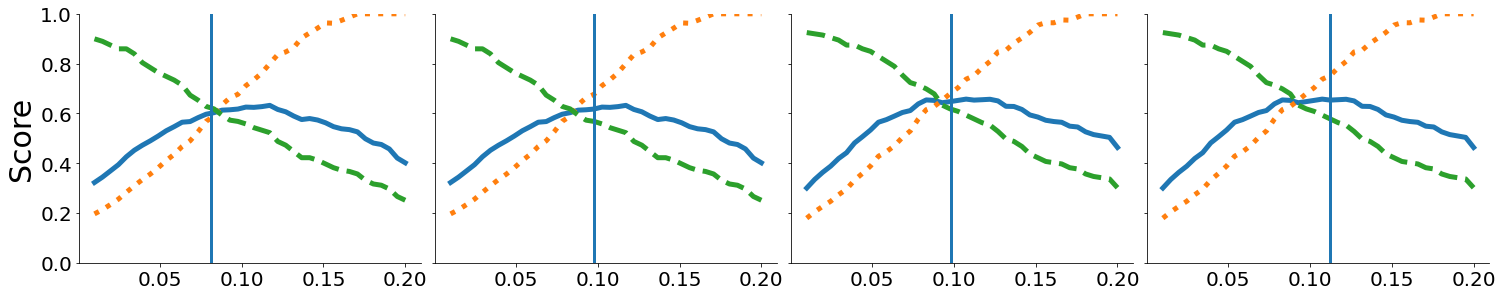

<Figure size 1152x432 with 0 Axes>

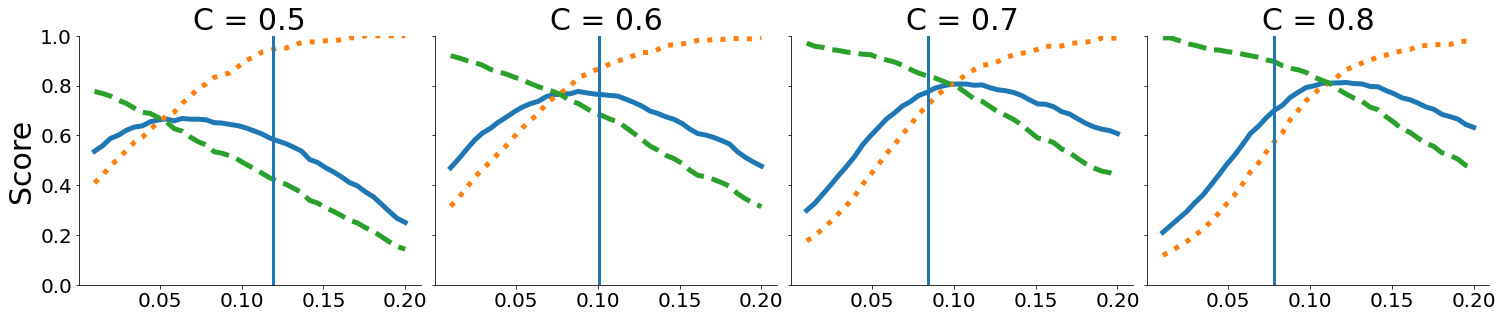

<Figure size 1152x432 with 0 Axes>

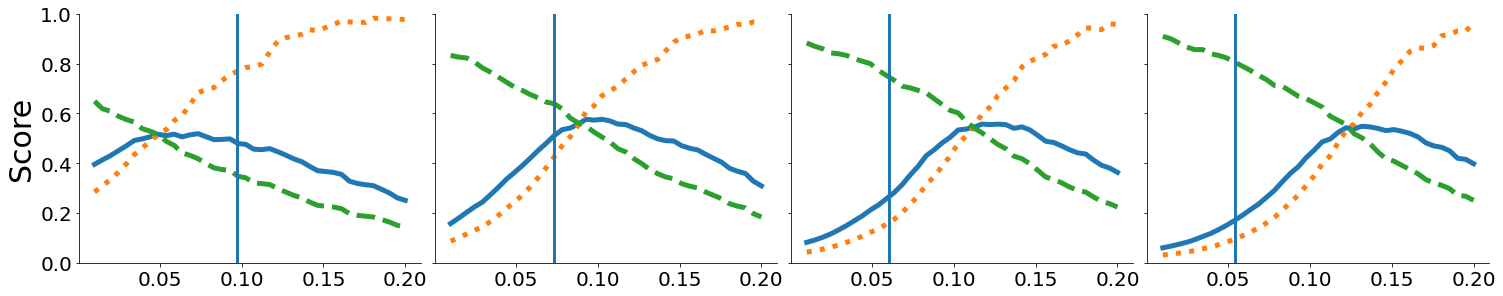

<Figure size 1152x432 with 0 Axes>

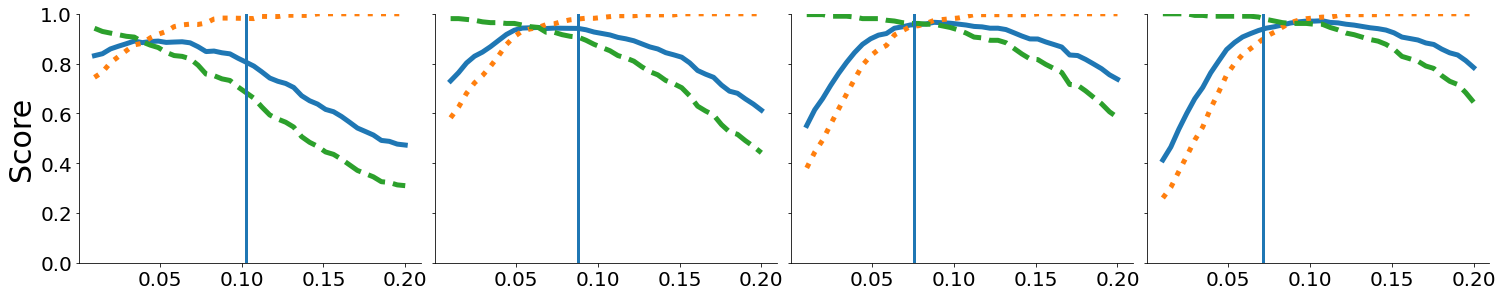

<Figure size 1152x432 with 0 Axes>

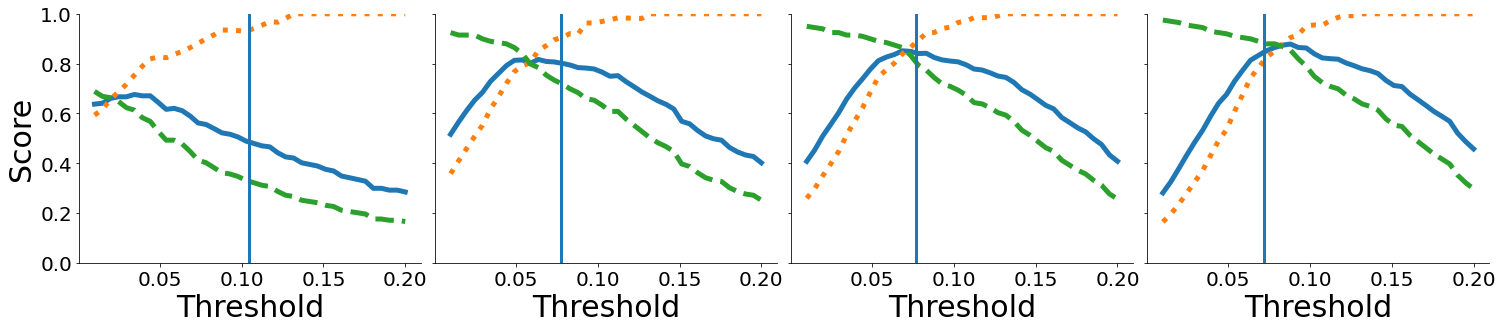

In [8]:
vis_f1(300, 200, (0.5, 0.6, 0.7, 0.8), title=False, show_legend=False)
vis_f1(300, 200, (0.5, 0.6, 0.7, 0.8), graph="scale-free", title=False, show_legend=False, show_C=False, show_xlabel=False)
vis_f1(200, 300, (0.5, 0.6, 0.7, 0.8), title=False, show_legend=False, show_xlabel=False)
vis_f1(200, 300, (0.5, 0.6, 0.7, 0.8), graph="scale-free", title=False, show_legend=False, show_C=False, show_xlabel=False)
vis_f1(400, 200, (0.5, 0.6, 0.7, 0.8), title=False, show_legend=False, show_C=False, show_xlabel=False)
vis_f1(400, 200, (0.5, 0.6, 0.7, 0.8), graph="scale-free", title=False, show_legend=False, show_C=False)

In [6]:
def vis_f1_mle(n_seq, d_seq, graph="random", show_legend=True, show_xlabel=True, show_C=True):
    color = sns.color_palette()
    
    f1 = pd.DataFrame()
    num_settings = len(n_seq)
    for i in range(num_settings):
        n = n_seq[i]
        d = d_seq[i]
        if graph=="random":
            new = pd.read_csv( "../data/f1thresholded_mlen" + str(n) + "d" + str(d) + ".csv")#, index_col="threshold")
            new["setting"] = "n=" + str(n) + ", d=" + str(d)
            f1 = f1.append(new)
        else:
            new = pd.read_csv( "../data/sff1thresholded_mlen" + str(n) + "d" + str(d) + ".csv")#, index_col="threshold")
            new["setting"] = "n=" + str(n) + ", d=" + str(d)
            f1 = f1.append(new)
    
    plt.figure(figsize=(22,6))
    plt.subplots_adjust(hspace=5)
    
    g = sns.FacetGrid(f1, col="setting", aspect=1.7)
    g.set(ylim=(0, 1))
    g.map(sns.lineplot, "threshold", "f1score", color=color[0], linewidth=3)
    g.map(sns.lineplot, "threshold", "precision", color=color[1], linewidth=3, linestyle="dotted")
    g.map(sns.lineplot, "threshold", "recall", color=color[2], linewidth=3, linestyle="--")
    if show_legend:
        g.add_legend(labels=("F1", "Precision", "Recall"), fontsize=20) 
    g.set_axis_labels("Threshold", "Score")
    g.set_titles(col_template = '{col_name}')
    
    
    i = 0
    for ax in g.axes.flat:
        if show_xlabel:  
            ax.set_xlabel(ax.get_xlabel(), fontsize= 15)
        else:
            ax.set_xlabel("")
        if show_C:
            ax.set_title(ax.get_title(), fontsize=15)
        else:
            ax.set_title("")
        ax.set_ylabel(ax.get_ylabel(), fontsize= 15)
        
        i += 1
        #ax.set_xticks((0.0, 0.5, 1.0, 1.5, 2.0))
        ax.set_xticks((0.0, 0.25, 0.5, 0.75, 1.0))
        ax.xaxis.set_tick_params(labelsize=10)
        ax.yaxis.set_tick_params(labelsize=10)
        
    g.savefig("../plots/" + graph + "/mlenf1" + ".pdf", format="pdf") 
    plt.show()

<Figure size 1584x432 with 0 Axes>

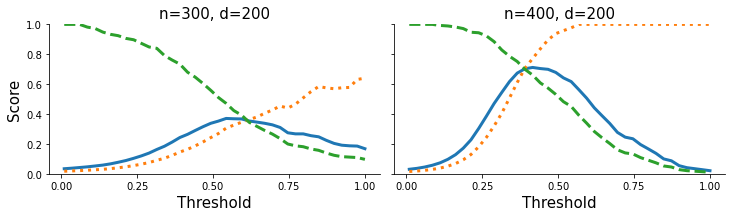

<Figure size 1584x432 with 0 Axes>

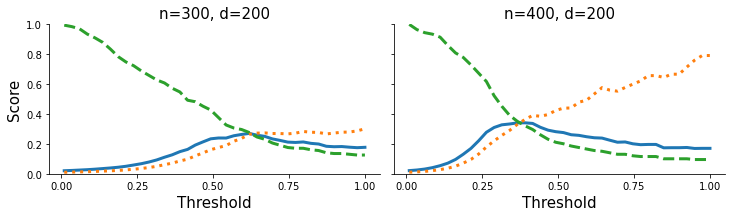

In [9]:
vis_f1_mle([300, 400], [200, 200], show_legend=False)
vis_f1_mle([300, 400], [200, 200], show_legend=False, graph="scale-free")